In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data
df_loans = pd.read_csv('/content/drive/MyDrive/Project 4 MN Home-loan Predictive Model (HMDA Data-source)/\
Clean_Data_For_Model/Cleaned_loan_data_for_model.csv')

df_loans.head()

,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
0,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,Secured by a first lien,Exempt,Exempt,185000.0,Not a high-cost mortgage,52.0,Asian,Male,NaN,10.74
1,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not a high-cost mortgage,58.0,White,Female,NaN,6.68
2,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,715000.0,Not a high-cost mortgage,337.0,White,Male,NaN,5.94
3,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,105000.0,Not a high-cost mortgage,169.0,White,Male,NaN,10.24
4,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not applicable,93.0,White,Male,NaN,6.11


In [ ]:
# Define features set
X = df_loans.copy()
X.drop("action_taken", axis=1, inplace=True)
X.head()

,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,purchaser_type,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
0,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,Not applicable,...,Secured by a first lien,Exempt,Exempt,185000.0,Not a high-cost mortgage,52.0,Asian,Male,NaN,10.74
1,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,Not applicable,...,Secured by a first lien,Exempt,Exempt,55000.0,Not a high-cost mortgage,58.0,White,Female,NaN,6.68
2,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,Not applicable,...,Secured by a first lien,Exempt,Exempt,715000.0,Not a high-cost mortgage,337.0,White,Male,NaN,5.94
3,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,Not applicable,...,Secured by a first lien,Exempt,Exempt,105000.0,Not a high-cost mortgage,169.0,White,Male,NaN,10.24
4,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,Not applicable,...,Secured by a first lien,Exempt,Exempt,55000.0,Not applicable,93.0,White,Male,NaN,6.11


In [ ]:
# Define target vector
y = df_loans["action_taken"].ravel()
y[:5]

<ipython-input-5-08d1781e713c>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = df_loans["action_taken"].ravel()


array([1, 1, 1, 1, 1])

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Creating StandardScaler instance
X_scaler = StandardScaler()

In [ ]:
# Fitting Standard Scaller
# X_scaler = scaler.fit(X_train)  # This line was causing the error

# Let's look at our data types first
print("Data types of our features:")
print(X.dtypes)

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

print("\nNumeric columns:")
print(numeric_columns)
print("\nCategorical columns:")
print(categorical_columns)

# Remove or encode categorical columns
# Option 1: Drop categorical columns
X_numeric = X[numeric_columns]

# Scale only the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes
print("\nTraining set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

#Now fit the scaler on the numeric data only
X_scaler = scaler.fit(X_train) # Use the scaler instance you created for X_scaled

Data types of our features:
activity_year                          int64
lei                                   object
state_code                            object
county_name                           object
conforming_loan_limit                 object
derived_dwelling_category             object
derived_ethnicity                     object
derived_race                          object
derived_sex                           object
purchaser_type                        object
preapproval                           object
loan_type                             object
loan_purpose                          object
lien_status                           object
reverse_mortgage                      object
open-end_line_of_credit               object
loan_amount                          float64
hoepa_status                          object
income                               float64
applicant_race-1                      object
applicant_sex                         object
denial_reason-1            

In [ ]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=3000,class_weight={0:2,1:1}, random_state=78)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train) # This line is added to fit the model

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2,111
Actual 1,8,15533


Accuracy Score : 0.9923981091094928
Classification Report
              precision    recall  f1-score   support

           0       0.20      0.02      0.03       113
           1       0.99      1.00      1.00     15541

    accuracy                           0.99     15654
   macro avg       0.60      0.51      0.51     15654
weighted avg       0.99      0.99      0.99     15654



In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.5266046760328943, 'county_name'),
 (0.31070829806952166, 'state_code'),
 (0.16268702589758408, 'lei'),
 (0.0, 'activity_year')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

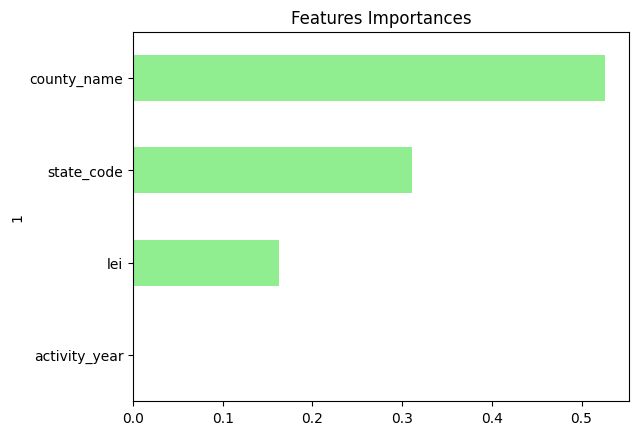

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)